# Sampling

### Klassenverteilung

In [44]:
!pip install monai

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 104.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 158.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 160.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 165.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 134.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 187.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 195.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 154.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 162.3 

In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2

import monai
from monai.transforms import LoadImage

In [4]:
image_paths = glob.glob("/home/main/data/rgbs_colorNormalized/*.png")
mask_paths = glob.glob("/home/main/data/masks/*.png")

#print(f"Gefundene Dateien: {image_paths}")
#print(f"Gefundene Dateien: {mask_paths}")

In [5]:
loader = LoadImage(image_only=False, reader="PILReader", reverse_indexing=False)

for path in image_paths:
    image, meta = loader(path)

In [41]:
from sklearn.model_selection import train_test_split

# erst Train/Valid vs. Test Split
train_valid_images, eval_images, train_valid_masks, test_masks = train_test_split(
    image_files, mask_files, test_size=0.2, random_state=42, stratify=mask_files
)

# dann Train vs. Valid Split
train_images, valid_images, train_masks, valid_masks = train_test_split(
    train_valid_images, train_valid_masks, test_size=0.25, random_state=42, stratify=train_valid_masks
) 

print("Train Images:", train_images)
print("Valid Images:", valid_images)
print("Test Images:", test_images)

from torch.utils.data import WeightedRandomSampler
import numpy as np

# Klassenverteilung
labels = np.array([0, 1, 0, 0, 1])  # 0 = Hintergrund, 1 = Tumor
class_counts = np.bincount(labels)
weights = 1.0 / class_counts
sample_weights = weights[labels]

# WeightedRandomSampler
sampler = WeightedRandomSampler(sample_weights, num_samples=len(labels), replacement=True)

# DataLoader mit WeightedRandomSampler
data_loader = DataLoader(dataset, sampler=sampler, batch_size=2)

for batch in data_loader:
    print(batch["image"].shape, batch["label"])


ModuleNotFoundError: No module named 'sklearn'

In [14]:
dist_all = np.zeros(22, dtype=int)
for file in mask_files:
    mask = cv2.imread(file)
    blue_channel = mask[:, :, 0]
    counts = np.bincount(blue_channel.ravel(), minlength=22)
    dist_all += counts
dist_all = dict(enumerate(dist_all))
print(dist_all)

{0: 560816697, 1: 800549011, 2: 729124793, 3: 208576923, 4: 132077368, 5: 956946, 6: 4805360, 7: 53662832, 8: 1318392, 9: 31567301, 10: 35378425, 11: 5235680, 12: 61713, 13: 2151232, 14: 215585, 15: 1721662, 16: 22510, 17: 1018897, 18: 11310092, 19: 501158, 20: 1260276, 21: 0}


In [15]:
dist_ev = np.zeros(22, dtype=int)
for file in masks_ev:
    mask = cv2.imread(file)
    blue_channel = mask[:, :, 0]
    counts = np.bincount(blue_channel.ravel(), minlength=22)
    dist_ev += counts
dist_ev = dict(enumerate(dist_ev))
print(dist_ev)

{0: 1331559, 1: 173816768, 2: 128161163, 3: 32293763, 4: 30210043, 5: 199174, 6: 542414, 7: 18191190, 8: 0, 9: 1264193, 10: 2818937, 11: 2555616, 12: 0, 13: 374083, 14: 0, 15: 185791, 16: 0, 17: 0, 18: 2608973, 19: 0, 20: 0, 21: 0}


In [16]:
dist_tr = np.zeros(22, dtype=int)
for file in masks_tr:
    mask = cv2.imread(file)
    blue_channel = mask[:, :, 0]
    counts = np.bincount(blue_channel.ravel(), minlength=22)
    dist_tr += counts
dist_tr = dict(enumerate(dist_tr))
print(dist_tr)

{0: 552733027, 1: 426790659, 2: 444682812, 3: 125561072, 4: 79613211, 5: 726571, 6: 3134017, 7: 29749769, 8: 1318392, 9: 26800742, 10: 31566409, 11: 2680064, 12: 61713, 13: 881122, 14: 215585, 15: 500464, 16: 22510, 17: 1018897, 18: 5936097, 19: 36161, 20: 1260276, 21: 0}


In [35]:
dist_val = np.zeros(22, dtype=int)
for file in masks_val:
    mask = cv2.imread(file)
    blue_channel = mask[:, :, 0]
    counts = np.bincount(blue_channel.ravel(), minlength=22)
    dist_val += counts
dist_val = dict(enumerate(dist_val))
print(dist_val)

{0: 6752111, 1: 199941584, 2: 156280818, 3: 50722088, 4: 22254114, 5: 31201, 6: 1128929, 7: 5721873, 8: 0, 9: 3502366, 10: 993079, 11: 0, 12: 0, 13: 896027, 14: 0, 15: 1035407, 16: 0, 17: 0, 18: 2765022, 19: 464997, 20: 0, 21: 0}


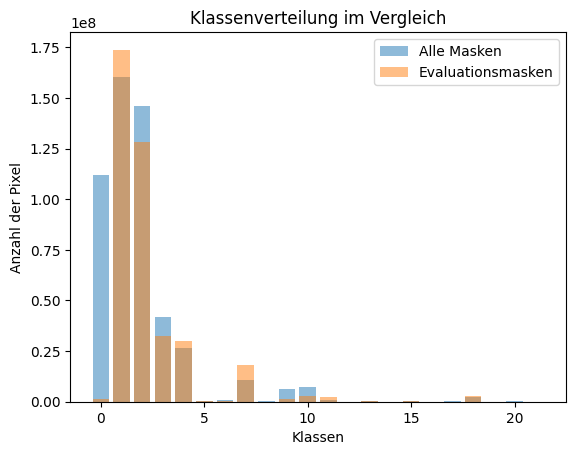

In [31]:
keys1 = np.array(list(dist_all.keys()))
values1 = np.array(list(dist_all.values()))
keys2 = np.array(list(dist_ev.keys()))
values2 = np.array(list(dist_ev.values()))

plt.bar(keys1, values1 * 0.2, alpha=0.5, label='Alle Masken')
plt.bar(keys2, values2, alpha=0.5, label='Evaluationsmasken')
plt.bar
plt.xlabel("Klassen")
plt.ylabel("Anzahl der Pixel")
plt.legend()
plt.title("Klassenverteilung im Vergleich")
plt.show()

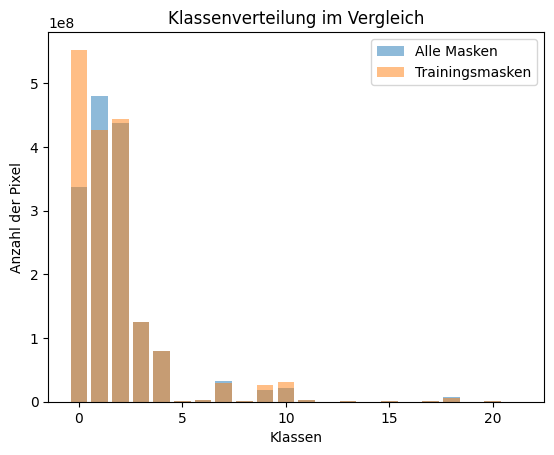

In [32]:
keys1 = np.array(list(dist_all.keys()))
values1 = np.array(list(dist_all.values()))
keys2 = np.array(list(dist_tr.keys()))
values2 = np.array(list(dist_tr.values()))

plt.bar(keys1, values1 * 0.6, alpha=0.5, label='Alle Masken')
plt.bar(keys2, values2, alpha=0.5, label='Trainingsmasken')
plt.bar
plt.xlabel("Klassen")
plt.ylabel("Anzahl der Pixel")
plt.legend()
plt.title("Klassenverteilung im Vergleich")
plt.show()

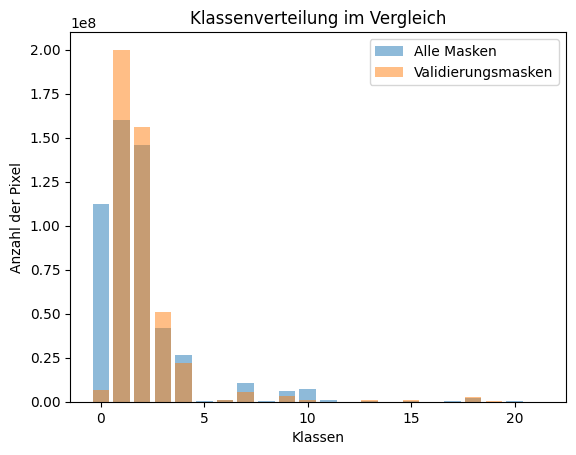

In [37]:
keys1 = np.array(list(dist_all.keys()))
values1 = np.array(list(dist_all.values()))
keys2 = np.array(list(dist_val.keys()))
values2 = np.array(list(dist_val.values()))

plt.bar(keys1, values1 * 0.2, alpha=0.5, label='Alle Masken')
plt.bar(keys2, values2, alpha=0.5, label='Validierungsmasken')
plt.bar
plt.xlabel("Klassen")
plt.ylabel("Anzahl der Pixel")
plt.legend()
plt.title("Klassenverteilung im Vergleich")
plt.show()